Decision Tree Regression on California House Pricing dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# importing the data for linear regression.
from sklearn.datasets import fetch_california_housing

In [4]:
df=fetch_california_housing(as_frame=True)

In [5]:
# splitting dataset into dependent and independent features
x=df.data
y=df.target

In [6]:
# checking is their any null values in data
print(x.isnull().sum(),"\n")
print(y.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64 

0


In [7]:
# splitting dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [8]:
# standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Model1 without hyperparameter tunning


In [9]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor(random_state=42)

In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model1,x_train,y_train,cv=5)
print("Cross-validation scores:", score)
print("Mean CV Accuracy:", np.mean(score))

Cross-validation scores: [0.57663124 0.51763585 0.62101516 0.5947676  0.59672836]
Mean CV Accuracy: 0.581355641278966


In [10]:
# fitting the model1 on train data
model1.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [11]:
# now predicting for test data by mdoel1
y_pred1=model1.predict(x_test)

In [ ]:
# checking for residual error
from sklearn.metrics import r2_score,mean_squared_error
print("R2 Score :-",r2_score(y_test,y_pred1),"\n")
mse=mean_squared_error(y_test,y_pred1)
print("RMSE :-",np.sqrt(mse))

# r2_score the closer to 1 is the better
# Lower RMSE = Better model performance.

R2 Score :- 0.5982935403325718 

RMSE :- 0.7261238461043761


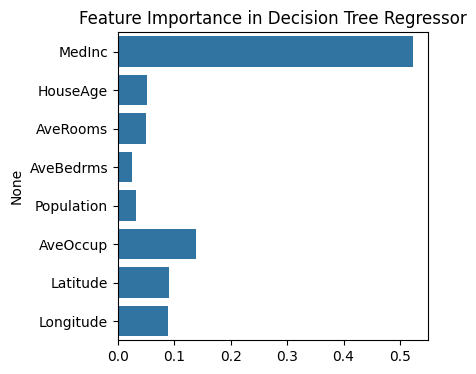

In [17]:
# showing the feature importance of dataset
importance = model1.feature_importances_
features = x.columns
plt.figure(figsize=(4,4))

sns.barplot(x=importance, y=features)
plt.title("Feature Importance in Decision Tree Regressor")
plt.show()


Now creating a model2 with hyperparameter tunning

In [19]:
from sklearn.model_selection import GridSearchCV

param={
    "max_depth":[3,5,10,15,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,3,4]
}

In [20]:
model2=GridSearchCV(estimator=model1,param_grid=param,cv=5,scoring="r2")

In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model2,x_train,y_train,cv=5)
print("Cross-validation scores:", score)
print("Mean CV Accuracy:", np.mean(score))

Cross-validation scores: [0.67701234 0.65396912 0.7077253  0.69355604 0.69247793]
Mean CV Accuracy: 0.6849481451674502


In [21]:
# fitting model2 on data
model2.fit(x_train,y_train)


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [23]:
# showing best parameters and best CV Score
print("Best Paramters :-",model2.best_params_)
print("Best Score :-",model2.best_score_)

Best Paramters :- {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score :- 0.6849481451674502


In [27]:
model2_final=model2.best_estimator_
y_pred_2=model2_final.predict(x_test)

In [28]:
# now checking the residual errors
print("R2 Score :-",r2_score(y_test,y_pred_2))
mse=mean_squared_error(y_test,y_pred_2)
print("RMSE :-",np.sqrt(mse))

R2 Score :- 0.7012178094728001
RMSE :- 0.6262296771691942


By using hyperparameter we reduced the RMSE and increase the r2 score which is good for our model 

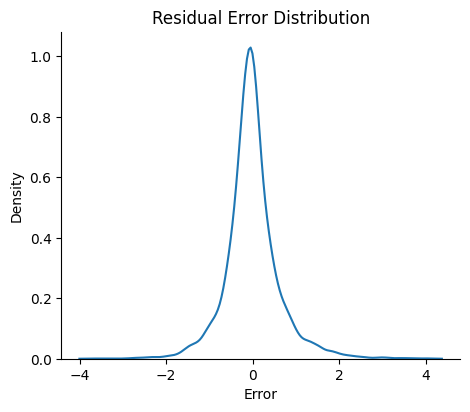

In [36]:
# visualizing the residual error
sns.displot(y_test-y_pred_2,kind='kde',height=4, aspect=1.2)
plt.title("Residual Error Distribution")
plt.xlabel("Error")
plt.show()